# HW Overview
`
Created By   : Dr. James G. Shanahan
EMAIL: James.Shanahan AT Gmail.com`

`Completed By: Jordan Klein
 Email: jklein AT bryant.edu`


## HW submission instructions: consult Canvas

The best approach is to work through this notebook. To cross-check your work, you can verify you have completed the sections marked "TASK:"

Broadly speaking you will be graded on the following:

* Download the data and preprocess the data
* Configure and perform a grid search over the specified range of hyperparameter settings
* Visualize the results of gridsearch and discuss the best model
* Report performance on the held-out test set; present a table of results (for the different models you build)



# HW Template solution

Here is a template section that will serve you well when tackling this homework. It is based on the Digits image dataset (10 digits).


## A brief intro to working with image data via the Digits Dataset
The digits dataset is one of datasets scikit-learn comes with that do not require the downloading of any file from some external website. The code below will load the digits dataset.

For more information click [here Digits dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html)

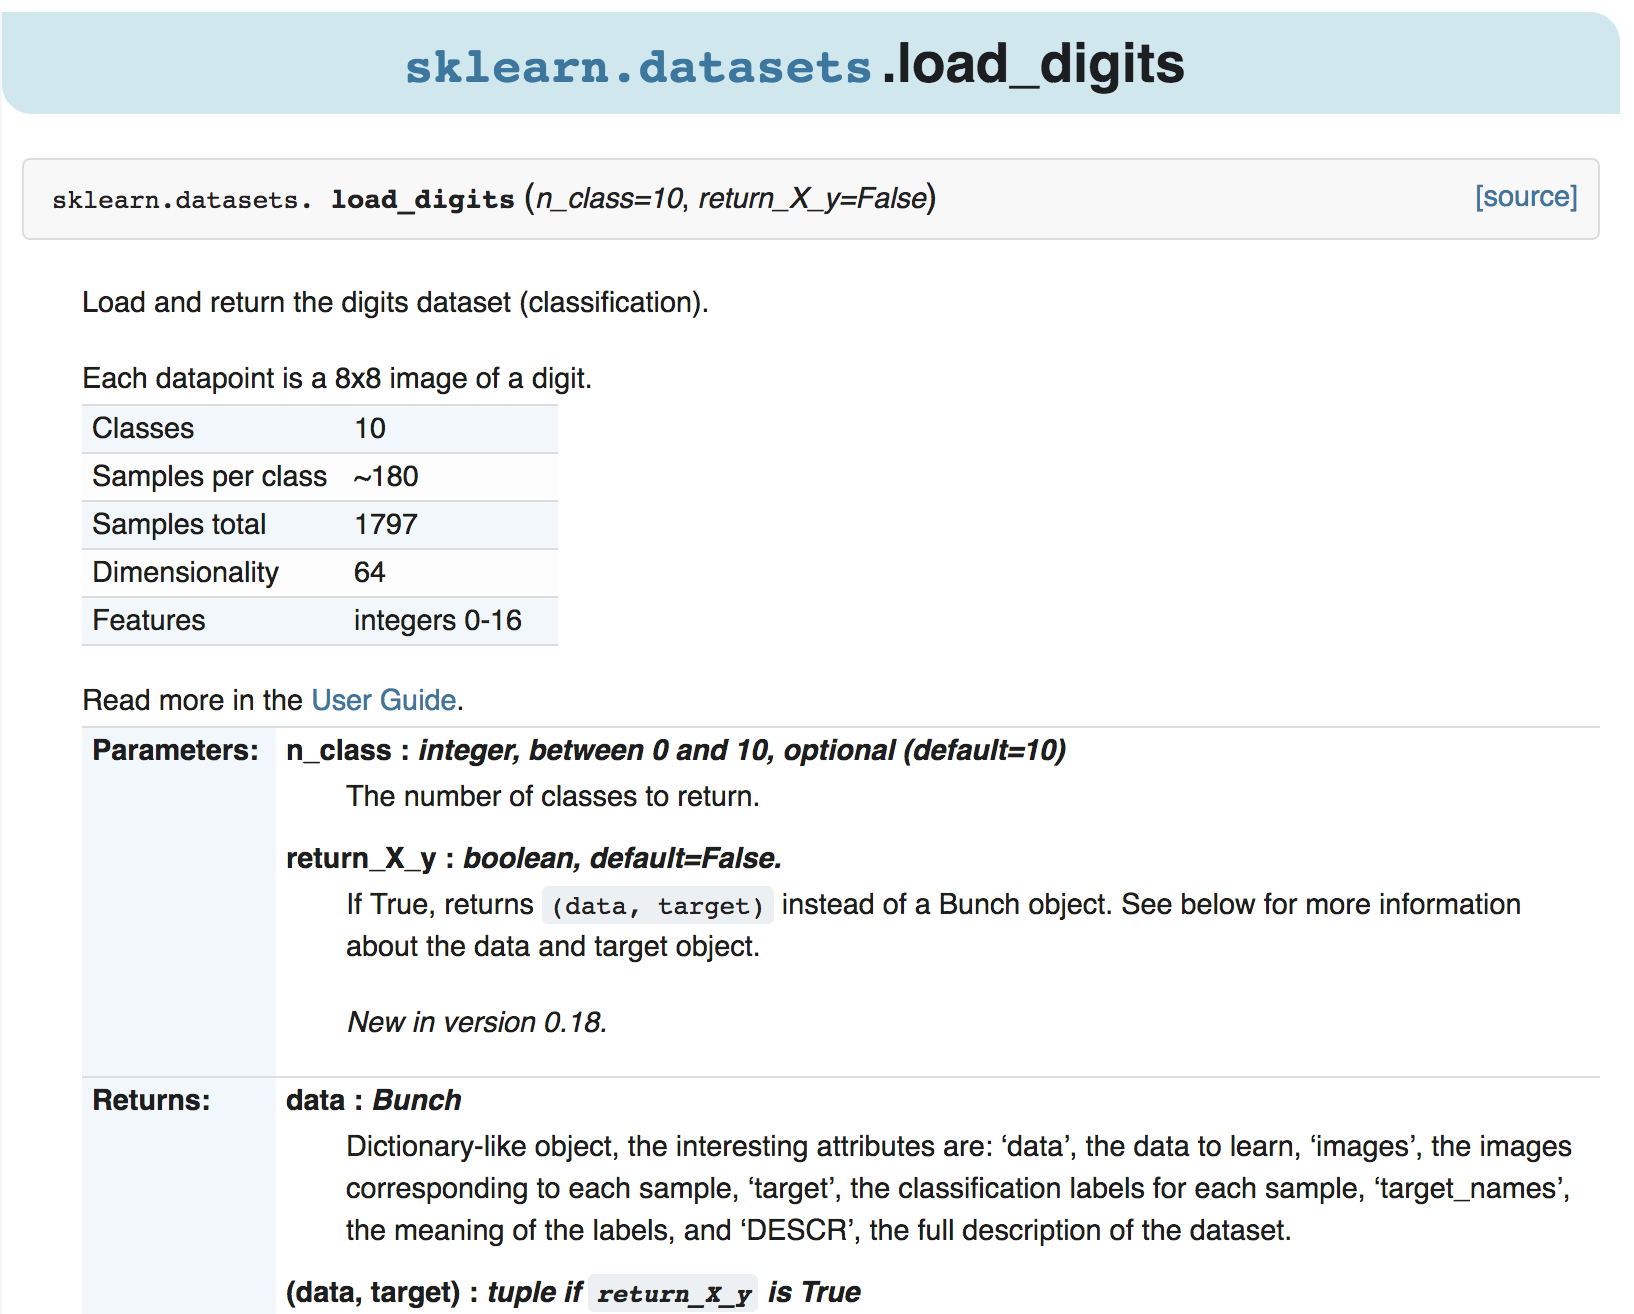

##  All the code for the MNIST via SKLearn KNN Classifier

Image Data Shape (1797, 64)
Label Data Shape (1797,)
digits.data[0] #first image is vector that needs reshaping 
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
digits.target[0] #first image is a ZERO (0):0
The following are the classes in this DIGITs classification problem: [0 1 2 3 4 5 6 7 8 9]
Class: 0 has 178 examples
Class: 1 has 182 examples
Class: 2 has 177 examples
Class: 3 has 183 examples
Class: 4 has 181 examples
Class: 5 has 182 examples
Class: 6 has 181 examples
Class: 7 has 179 examples
Class: 8 has 174 examples
Class: 9 has 180 examples
Train has 1347 examples
Test  has 450  examples
# Tuning hyper-parameters for accuracy

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:   17.8s finished


Best parameters set found on development set:

Best hyper parameters are : {'n_neighbors': 1, 'p': 2}

Grid scores on development set:

accuracy  (+/-stdev*2)     hyper-params
0.978 (+/-0.005) for {'n_neighbors': 1, 'p': 1}
0.985 (+/-0.015) for {'n_neighbors': 1, 'p': 2}
0.985 (+/-0.008) for {'n_neighbors': 1, 'p': 3}
0.973 (+/-0.012) for {'n_neighbors': 2, 'p': 1}
0.979 (+/-0.010) for {'n_neighbors': 2, 'p': 2}
0.981 (+/-0.008) for {'n_neighbors': 2, 'p': 3}
0.981 (+/-0.009) for {'n_neighbors': 3, 'p': 1}
0.985 (+/-0.005) for {'n_neighbors': 3, 'p': 2}
0.985 (+/-0.008) for {'n_neighbors': 3, 'p': 3}
0.978 (+/-0.013) for {'n_neighbors': 4, 'p': 1}
0.984 (+/-0.013) for {'n_neighbors': 4, 'p': 2}
0.984 (+/-0.014) for {'n_neighbors': 4, 'p': 3}
0.983 (+/-0.015) for {'n_neighbors': 5, 'p': 1}
0.985 (+/-0.014) for {'n_neighbors': 5, 'p': 2}
0.984 (+/-0.013) for {'n_neighbors': 5, 'p': 3}

Detailed classification report:

The model is trained on the full development set.
The scores are compu

,Model,Dataset,TrainAcc,TestAcc,TrainTime(sec),TestTime(sec),Param,Description
0,knn,Digits,98.52%,99.11%,17.83 secs,0.00 secs,"{'n_neighbors': 1, 'p': 2}",5-foldCV-based gridSearch BEST model


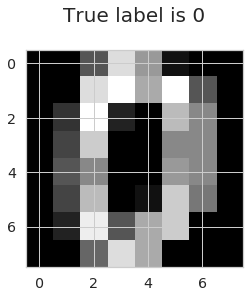

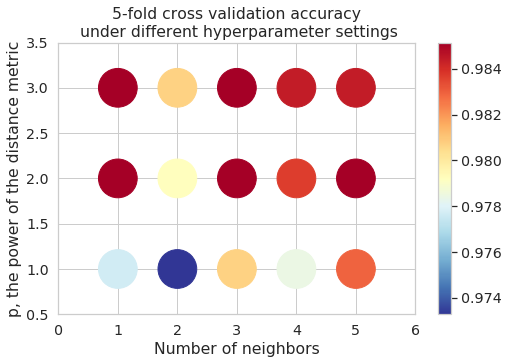

In [1]:
# Brief Template KNN Classifier that uses GridSearch

#This is a shortened template section  that will serve you well when tackling this week's homework. It is based on building a classifier to classify handwritten digits image into one of ten digits.

#For more information click [here Digits dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html)


##  Load data and do some EDA

from __future__ import print_function
import numpy as np
import pandas as pd

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, PredefinedSplit
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from datetime import datetime
from sklearn import datasets
from sklearn.datasets import load_digits

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#Set style for plotting
sns.set(style="whitegrid", font_scale=1.3)
matplotlib.rcParams["legend.framealpha"] = 1
matplotlib.rcParams["legend.frameon"] = True


# Loading the Digits dataset
#------------------------------------------
digits = load_digits()

# Exploratory Data Analysis EDA
#------------------------------------------
# Print to show there are 1797 images (8 by 8 images for a dimensionality of 64)
print(f"Image Data Shape {digits.data.shape}")
# Print to show there are 1797 labels (integers from 0-9)
print(f"Label Data Shape {digits.target.shape}")
print(f"digits.data[0] #first image is vector that needs reshaping \n{digits.data[0]}")
print(f"digits.target[0] #first image is a ZERO (0):{digits.target[0]}") 
print(f"The following are the classes in this DIGITs classification problem: {np.unique(digits.target)}")
for class_label, count in zip(np.arange(len(np.unique(digits.target))),
                          np.bincount(digits.target)):
    print(f"Class: {class_label} has {count} examples")
    
# Visualize first example digit
#------------------------------------------
plt.imshow(np.reshape(digits.data[0], (8,8)), cmap=plt.cm.gray)
plt.title('True label is %i\n' % digits.target[0], fontsize = 20)

# Split data into train and test subsets
#------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)
print(f"Train has {X_train.shape[0]} examples")
print(f"Test  has {X_test.shape[0]}  examples")


# Normalize the image grayscale images
#------------------------------------------
X_train /= 255
X_test /= 255

# Track experiments in a dataframe
#------------------------------------------
experimentLog = pd.DataFrame(columns=["Model", "Dataset", "TrainAcc", "TestAcc", "TrainTime(sec)", "TestTime(sec)", "Param", "Description",])
#experimentLog.loc[len(experimentLog)] = ["Knn Dummy", "a desc", 34, 34, "k=4, p=2", 6.4]# add a sample line


## Gridsearch to find the best hyperparameters for the KNN Classifier

#%%time

knn_sk = KNeighborsClassifier(n_jobs=-1) ## Use all available cores/CPUs on you machine to run search in parallel

# Gridsearch over these hyperparameters
#------------------------------------------
n_neighbors_range = list(range(1,6))   # number of neighbors
p_range =           list (range(1,4))  # power of the similarity function p =1 is Manhattan dist
parameters = {'n_neighbors': n_neighbors_range, 'p': p_range}

np.random.seed(42) # for multiple runs of the same model training, you should re-execute this line
start_time = datetime.now()   
score = 'accuracy' # limited to accuracuy for now but could use other metrics such as precision, recall, etc.
print("# Tuning hyper-parameters for %s" % score)
print()

# Do the Gridsearch to find the best KNN
#------------------------------------------
#  search through different hyperparameter settings for KNN
#  Once the best combination of parameters is determined via gridsearch
#  in collaboration with crossfold valdiation
#  a KNN model is trained on the whole dataset using the best found parameters 
gridSearch_knn = GridSearchCV(estimator=knn_sk, 
                          param_grid=parameters,  
                          cv=5, 
                          #refit=False,  
                          return_train_score=False,
                          verbose=1,
                          # Refit an estimator using the best found parameters on the whole dataset.
                          refit=True, 
                          n_jobs=-1  #use multiple CPUs; divide and conquer!
                          )
gridSearch_knn.fit(X_train, y_train)

# Prepare a report the KNN hyperparamter search
#------------------------------------------------
print("Best parameters set found on development set:")
print()
print(f"Best hyper parameters are : {gridSearch_knn.best_params_}")
print()
print("Grid scores on development set:")
print()

means = gridSearch_knn.cv_results_['mean_test_score']  #access elements of the grid search results dictionary
stds = gridSearch_knn.cv_results_['std_test_score']
print(f'{score}  (+/-stdev*2)     hyper-params')
for mean, std, params in zip(means, stds, gridSearch_knn.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
print()
end_time = datetime.now()
wallTimeInSecondsTrain = (end_time - start_time).total_seconds()

print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
start_time = datetime.now()   
end_time = datetime.now()
wallTimeInSecondsTest = (end_time - start_time).total_seconds()
trainAcc = gridSearch_knn.best_score_ #CV accuracy score for best hyperparameter combo
    
# Evaluate the best KNN on the test set
#------------------------------------------
y_true, y_pred = y_test, gridSearch_knn.predict(X_test)
testAcc  = accuracy_score(y_true, y_pred)
experimentLog.loc[len(experimentLog)] =["knn", "Digits", f"{trainAcc*100:8.2f}%", f"{testAcc*100:8.2f}%", 
                                    f"{wallTimeInSecondsTrain:8.2f} secs", f"{wallTimeInSecondsTest:8.2f} secs",
                                    f"{gridSearch_knn.best_params_}","5-foldCV-based gridSearch BEST model"]
print(experimentLog)
print("best_p: ",gridSearch_knn.best_params_["p"])
print("best_n: ",gridSearch_knn.best_params_["n_neighbors"])

## Visualize the performance metrics along each hyperparameter
#---------------------------------------------------------------
plt.figure(figsize=(8, 5))
sc = plt.scatter(gridSearch_knn.cv_results_["param_n_neighbors"], 
                 gridSearch_knn.cv_results_["param_p"], 
                 c=gridSearch_knn.cv_results_["mean_test_score"], 
                 cmap = plt.get_cmap("RdYlBu_r"), 
                 s=1500)
plt.colorbar(sc)
plt.grid(True)
plt.gca().set_axisbelow(True)
plt.xlabel("Number of neighbors")
plt.ylabel("p, the power of the distance metric")
plt.title("5-fold cross validation accuracy\n under different hyperparameter settings")
plt.xlim([0, 6])
plt.ylim([0.5, 3.5]);

#Let's choose the best $p^*$ and see how accuracy depends on the number of nearest neightbors for a KNN classifier  $p$

experimentLog



# Assignment: Image classification dataset: CIFAR10

## CIFAR10 Image classification dataset
In this homework, we will be building an image classification system using the  CIFAR10 image classification dataset. This system will class images of belonging to 10 classes of objects. The label data for the test data is just a list of 10,000 numbers ranging from 0 to 9, which corresponds to each of the 10 classes in CIFAR-10. (And similarly for the training set.
* airplane : 0
* automobile : 1
* bird : 2
* cat : 3
* deer : 4
* dog : 5
* frog : 6
* horse : 7
* ship : 8
* truck : 9

The classes are completely mutually exclusive.  There is no overlap between automobiles and trucks. "Automobile" includes sedans, SUVs, things of that sort. "Truck" includes only big trucks. 

For the purposes of evaluation we have a separate test set consisting of images from the same ten classes that were used for training. Any system (such as a KNN classifier) trained on this dataset will not do well in the following scenarios:

* with images that are NOT in the ten classes, i.e., images must come from the same ten classes for this system to work well.
* with images that have a size other than 32 by 32 pixels spatially, i.e., images must be 32x32 pixels
* with images that have a different color space such as gray scale, i.e., images need to be in the RGB space.


The [CIFAR-10](http://www.cs.toronto.edu/~kriz/cifar.html) dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. Each image is matrix with dimensions:  width x height x RGB_num_channel



## Load dataset and get class train/test counts

In [6]:
%%time
from __future__ import print_function
import keras
from keras.datasets import cifar10
import os
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, PredefinedSplit
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from datetime import datetime

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

#Set style for plotting
sns.set(style="whitegrid", font_scale=1.3)
matplotlib.rcParams["legend.framealpha"] = 1
matplotlib.rcParams["legend.frameon"] = True

# Fix random seed for reproducibility
np.random.seed(42)
num_classes = 10

# The data, split between train and test sets:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('x_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

y_train = np.reshape(y_train, (-1)) #reshape the y matrix to a y vector
y_test  = np.reshape(y_test, (-1))

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
CPU times: user 100 ms, sys: 230 ms, total: 330 ms
Wall time: 842 ms


### How many test cases/images in the  CIFAR10 test dataset?
How many test cases/images in the  CIFAR10 test dataset?


- The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

### Pre-processing

This is a big dataset! There are 50,000 training images where each has 32x32 pixels, and each pixel has three components: reed, green and blue (RGB). Each example is organized as three-dimensional array as depicted below:

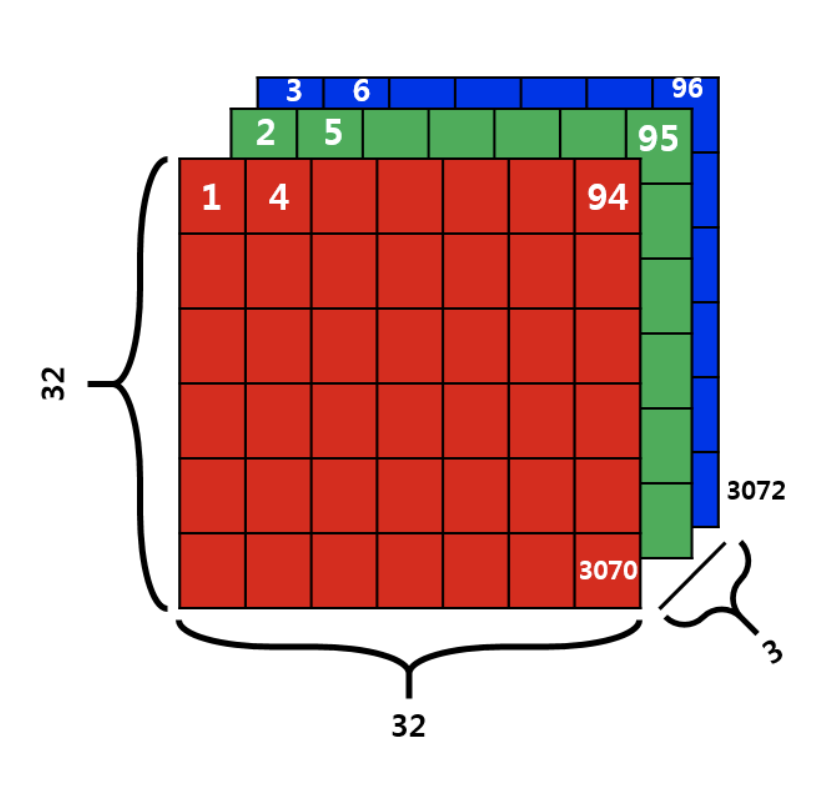

In [7]:
print(f"Train size:, {X_train.shape}")
print(f"Train size:, Exs: {X_train.shape[0]}, Width:{X_train.shape[1]}, Height:{X_train.shape[2]}, :Num_of_RGB_channels:{X_train.shape[3]}")


Train size:, (50000, 32, 32, 3)
Train size:, Exs: 50000, Width:32, Height:32, :Num_of_RGB_channels:3


The label data for the test data is just a list of 10,000 numbers ranging from 0 to 9, which corresponds to each of the 10 classes in CIFAR-10. (And similarly for the training set.
* airplane : 0
* automobile : 1
* bird : 2
* cat : 3
* deer : 4
* dog : 5
* frog : 6
* horse : 7
* ship : 8
* truck : 9

In [8]:
print(f"digits.target[0] #first image is a ZERO (0):{y_test[0]}") 
print(f"The following are the classes in this CIFAR classification problem: {np.unique(y_test)}")
label_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

for class_label, label, count in zip(np.arange(len(np.unique(y_test))), label_names, np.bincount(y_test)):
    print(f"Class: {class_label} {label:<11} has {count} examples")

digits.target[0] #first image is a ZERO (0):3
The following are the classes in this CIFAR classification problem: [0 1 2 3 4 5 6 7 8 9]
Class: 0 airplane    has 1000 examples
Class: 1 automobile  has 1000 examples
Class: 2 bird        has 1000 examples
Class: 3 cat         has 1000 examples
Class: 4 deer        has 1000 examples
Class: 5 dog         has 1000 examples
Class: 6 frog        has 1000 examples
Class: 7 horse       has 1000 examples
Class: 8 ship        has 1000 examples
Class: 9 truck       has 1000 examples


data -- a 10000x3072 numpy array of uint8s. Each row of the array stores a 32x32 colour image. The first 1024 entries contain the red channel values, the next 1024 the green, and the final 1024 the blue. The image is stored in row-major order, so that the first 32 entries of the array are the red channel values of the first row of the image.

In [9]:
X_train[0].shape

(32, 32, 3)

In [10]:
X_train[0][:,:,0]  #Red channel of the RGB image

array([[ 59,  43,  50, ..., 158, 152, 148],
       [ 16,   0,  18, ..., 123, 119, 122],
       [ 25,  16,  49, ..., 118, 120, 109],
       ...,
       [208, 201, 198, ..., 160,  56,  53],
       [180, 173, 186, ..., 184,  97,  83],
       [177, 168, 179, ..., 216, 151, 123]], dtype=uint8)

Text(0.5, 1.0, 'RED Channel: True label is frog')

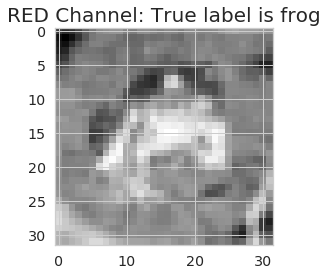

In [11]:
X_train[0][:,:,1].shape
plt.imshow(X_train[0][:,:,0], cmap=plt.cm.gray)
plt.title(f'RED Channel: True label is {label_names[y_train[0]]}', fontsize = 20)

In [12]:
X_train[0][:,:,1] #Green channel of the RGB image

array([[ 62,  46,  48, ..., 132, 125, 124],
       [ 20,   0,   8, ...,  88,  83,  87],
       [ 24,   7,  27, ...,  84,  84,  73],
       ...,
       [170, 153, 161, ..., 133,  31,  34],
       [139, 123, 144, ..., 148,  62,  53],
       [144, 129, 142, ..., 184, 118,  92]], dtype=uint8)

In [13]:
X_train[0][:,:,2] #Blue channel of the RGB image

array([[ 63,  45,  43, ..., 108, 102, 103],
       [ 20,   0,   0, ...,  55,  50,  57],
       [ 21,   0,   8, ...,  50,  50,  42],
       ...,
       [ 96,  34,  26, ...,  70,   7,  20],
       [ 96,  42,  30, ...,  94,  34,  34],
       [116,  94,  87, ..., 140,  84,  72]], dtype=uint8)

In [14]:
X_train[0][:,:,0].shape 

(32, 32)

### Data is arranged in #R G B R G B R G B..... R G B

In [15]:
print(f"{X_train[0][0:5,0,0]}, {X_train[0][0:5,0,1]}, {X_train[0][0:5,0,2]}")

[59 16 25 33 50], [62 20 24 25 32], [63 20 21 17 21]


In [16]:
img_flat = np.reshape(X_train[0], -1)
img_flat[:10] #R G B R G B R G B

array([59, 62, 63, 43, 46, 45, 50, 48, 43, 68], dtype=uint8)

Text(0.5, 1.0, 'True label is frog')

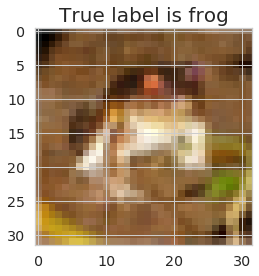

In [17]:
plt.imshow(np.reshape(X_train[0], (32,32,3)), cmap=plt.cm.gray)
plt.title(f'True label is {label_names[y_train[0]]}', fontsize = 20)
#np.reshape(X_train[0], (32,32,3))

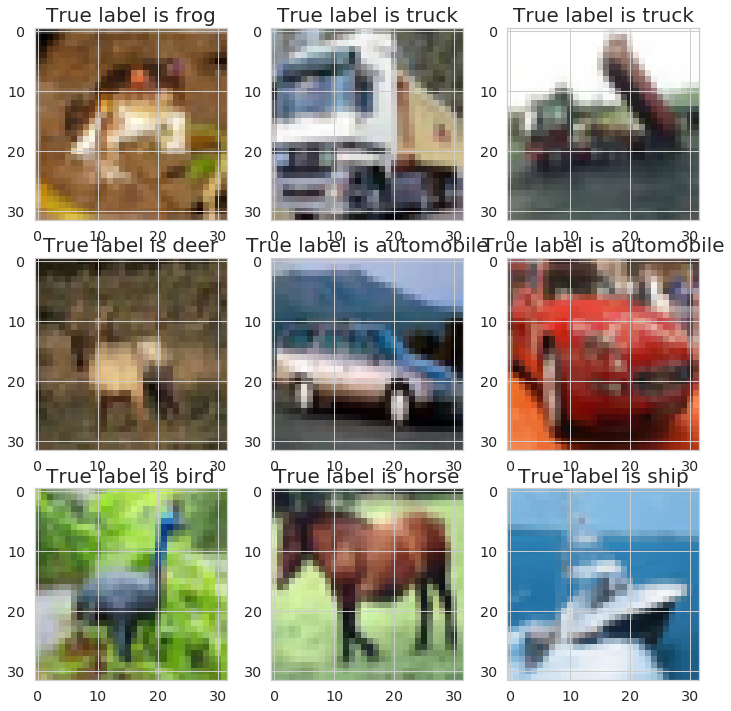

In [18]:
plt.figure(figsize=(12,12))
for index, (image, label_idx) in enumerate(zip(X_train[0:9], y_train[0:9])):
    plt.subplot(3, 3, index + 1)
    plt.imshow(image)
    plt.title(f'True label is {label_names[label_idx]}', fontsize = 20)

In [19]:
y_test

array([3, 8, 8, ..., 5, 1, 7])

### Flatten the image matrix of 32x32x3 to a vector of 3072 values

In [20]:
X_train = np.reshape(X_train, (-1,3072))
X_train.shape

(50000, 3072)

In [21]:
X_test = np.reshape(X_test, (-1,3072))
X_test.shape

(10000, 3072)

### Downsample the data so we can experiment more easily
Save the full dataset so we can train on the full training set later and do a blind test on the full test set.


In [22]:
X_train_full = X_train
y_train_full = y_train
X_test_full = X_test
y_test_full = y_test

Let's downsample (common strategy to get a POC, proof of concept working) the data by taking a random sample of 2% the training and test sets. This will  allow us to do some experiments much more quickly. 

In [23]:
subsample_rate = 0.02

We want to preserve the same quantity ratio between classes. In python such an option is called **stratification**. Let's randomly (with fixed initial seed for the sake of reproducibility) divide part of train data

In [24]:
X_train, _, y_train, _ = train_test_split(X_train, y_train, stratify=y_train, 
                                          train_size=subsample_rate, random_state=42)

Downsample for the  test also.

In [25]:
X_test, _, y_test, _ = train_test_split(X_test, y_test, stratify=y_test, 
                                        train_size=subsample_rate, random_state=42)

#### How many test cases/images in the downsampled CIFAR10 test dataset?
How many test cases/images in the downsampled CIFAR10 test dataset?


In [26]:
# The data, split between train and test sets:
print('x_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')


x_train shape: (1000, 3072)
1000 train samples
200 test samples


#### How many birds in the downsampled CIFAR10 test data set?

How many birds examples are in the first 100 examples of the downsampled CIFAR10 test set?

In [27]:
y_subset = y_test[0:100]
 
label_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

for class_label, label, count in zip(np.arange(len(np.unique(y_subset))), label_names, np.bincount(y_subset)):
    print(f"Class: {class_label} {label:<11} has {count} examples")


Class: 0 airplane    has 9 examples
Class: 1 automobile  has 10 examples
Class: 2 bird        has 9 examples
Class: 3 cat         has 7 examples
Class: 4 deer        has 8 examples
Class: 5 dog         has 12 examples
Class: 6 frog        has 14 examples
Class: 7 horse       has 14 examples
Class: 8 ship        has 9 examples
Class: 9 truck       has 8 examples


### Track experiements in a dataframe
For all experiments conducted in the HW please set up a separate log dataframe for each dataset and record major experiment outcomes (e.g., the best model from a gridsearch of hyperparameters)

In [30]:
# We have already initialized this above so no need to run this cell
experimentLog = pd.DataFrame(columns=["Model", "Dataset", "TrainAcc", "TestAcc", "TrainTime(sec)", "TestTime(sec)", "Param", "Description",])
#expLog.loc[len(expLog)] = ["Knn Dummy", "a desc", 34, 34, "k=4, p=2", 6.4]  
#expLog.loc[len(expLog)] = ["Knn", "a desc", 34, 34, "", 6.4]  

In [31]:
experimentLog

,Model,Dataset,TrainAcc,TestAcc,TrainTime(sec),TestTime(sec),Param,Description


# Solving image classification via KNN Classifier and GridSearchCV



## K Nearest Neighbors: Grid Search
Using the CIFAR-10 dataset, use the built-in Sklearn implementation of KNN classifier and find out the best set of parameters from the following range:

$$
\text{n_neighbors} \in \{1 \ldots 5\}\\
\text{p} \in \{1 \ldots 3\}
$$

where $\text{n_neighbors}$ is the number of neighbors to consider and $\text{p}$ is the order of $L_p$ metric (see explanation below)


### Sklearn  GridSearch with Cross Validation
Complete the code in this section to do the above hyperparameter tuning via SKLearn's `GridSearchCV` over the training set only. The test dataset should only be used to report your findings after you have committed to your best model(s).

Please use SKlearn KNN.

In [32]:
knn_sk = KNeighborsClassifier(n_jobs=-1)

And specify the dictionary of parameters we want to optimize along with their ranges

$\text{GridSearchCV}$ is a workhorse!  There are three main arguments:
* $\text{estimator} = \text{knn_sk} -$classifier to use; KNN from sklearn defined before
* $\text{param_grid} = \text{parameters} -$parameters ranges to test
* $\text{cv} = \text{split} -$splitting iterator to use

In [33]:
# comfirm we are using a subsample of the data
X_train.shape # 1000 training examples

(1000, 3072)

In [34]:
%%time
from __future__ import print_function

from sklearn import datasets
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, PredefinedSplit
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from datetime import datetime

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

#Set style for plotting
sns.set(style="whitegrid", font_scale=1.3)
matplotlib.rcParams["legend.framealpha"] = 1
matplotlib.rcParams["legend.frameon"] = True

knn_sk = KNeighborsClassifier(n_jobs=1)

# Set the parameters used by cross-validation
#==================================================#
n_neighbors_range = list(range(1,6))   # number of neighbors
p_range =           list (range(1,2))
#==================================================#
parameters = {'n_neighbors': n_neighbors_range, 'p': p_range}

np.random.seed(42) # for multiple runs of the same model training, you should re-execute this line
score = 'accuracy'  # limited to accuracuy for now but could use other metrics such as precision, recall, etc.
start_time = datetime.now()   

print("# Tuning hyper-parameters for %s" % score)
print()

gridSearch = GridSearchCV(estimator=knn_sk, 
                          param_grid=parameters,  
                          cv=5, 
                          refit=True,  
                          return_train_score=False,
                          verbose=1,
                          n_jobs=-1  #use multiple CPUs; divide and conquer!
                          )
gridSearch.fit(X_train, y_train)
print("Best parameters set found on development set:")
print()
print(gridSearch.best_params_)
print()
print("Grid scores on development set:")
print()
print(f'{score}  (+/-stdev*2)     hyper-params')

means = gridSearch.cv_results_['mean_test_score']  #access elements of the grid search results dictionary
stds = gridSearch.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, gridSearch.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
print()
end_time = datetime.now()
wallTimeInSecondsTrain = (end_time - start_time).total_seconds()

print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
start_time = datetime.now()   
y_true, y_pred = y_test, gridSearch.predict(X_test)
end_time = datetime.now()
wallTimeInSecondsTest = (end_time - start_time).total_seconds()
print(classification_report(y_true, y_pred))  # more detailed breakdown of the test perf; optional for now
print()
trainAcc = gridSearch.best_score_ #CV accuracy score for best hyperparameter combo
    
testAcc  = accuracy_score(y_true, y_pred)
# Track experiments in a dataframe
#------------------------------------------
try: experimentLog   ### if not defined then setup the experiment dataframe
except : experimentLog = pd.DataFrame(columns=["Model", "Dataset", "TrainAcc", "TestAcc", 
                                               "TrainTime(sec)", "TestTime(sec)", "Param", "Description",])
#experimentLog = pd.DataFrame(columns=["Model", "TrainAcc", "TestAcc", "TrainTime(sec)", "TestTime(sec)", "Params", "Description",])
experimentLog

# Tuning hyper-parameters for accuracy

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:  7.3min finished


Best parameters set found on development set:

{'n_neighbors': 4, 'p': 1}

Grid scores on development set:

accuracy  (+/-stdev*2)     hyper-params
0.236 (+/-0.039) for {'n_neighbors': 1, 'p': 1}
0.236 (+/-0.019) for {'n_neighbors': 1, 'p': 2}
0.231 (+/-0.023) for {'n_neighbors': 1, 'p': 3}
0.211 (+/-0.027) for {'n_neighbors': 2, 'p': 1}
0.204 (+/-0.042) for {'n_neighbors': 2, 'p': 2}
0.186 (+/-0.038) for {'n_neighbors': 2, 'p': 3}
0.225 (+/-0.030) for {'n_neighbors': 3, 'p': 1}
0.237 (+/-0.042) for {'n_neighbors': 3, 'p': 2}
0.221 (+/-0.028) for {'n_neighbors': 3, 'p': 3}
0.257 (+/-0.043) for {'n_neighbors': 4, 'p': 1}
0.240 (+/-0.020) for {'n_neighbors': 4, 'p': 2}
0.227 (+/-0.045) for {'n_neighbors': 4, 'p': 3}
0.247 (+/-0.034) for {'n_neighbors': 5, 'p': 1}
0.254 (+/-0.026) for {'n_neighbors': 5, 'p': 2}
0.244 (+/-0.039) for {'n_neighbors': 5, 'p': 3}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation s

,Model,Dataset,TrainAcc,TestAcc,TrainTime(sec),TestTime(sec),Param,Description


In [36]:
experimentLog

,Model,Dataset,TrainAcc,TestAcc,TrainTime(sec),TestTime(sec),Param,Description


In [37]:
best_p = gridSearch.best_params_["p"]
best_n = gridSearch.best_params_["n_neighbors"]
print("best_p: ",best_p)
print("best_n: ",best_n)

best_p:  1
best_n:  4


### best_model.cv_results_ holds a lot of useful information

Please have a closer look at  

* gridSearch.cv_results_["param_n_neighbors"]                
* gridSearch.cv_results_["param_p"]
* gridSearch.cv_results_["mean_test_score"] 


In [31]:
# have a look at CV dictionary of results
gridSearch.cv_results_

{'mean_fit_time': array([0.0782661 , 0.07016883, 0.07448506, 0.06548986, 0.07334704,
        0.07513485, 0.07126799, 0.08635926, 0.08198714, 0.06967087,
        0.07668443, 0.07718959, 0.07435007, 0.07178307, 0.07476764]),
 'std_fit_time': array([0.00783223, 0.00395334, 0.00317168, 0.00500933, 0.01471887,
        0.00628573, 0.00437373, 0.00872992, 0.01061304, 0.00291813,
        0.01022577, 0.01083335, 0.01702604, 0.0098778 , 0.00679396]),
 'mean_score_time': array([ 1.0693656 ,  1.03878846, 40.77429814,  1.19308391,  1.32794328,
        40.05926652,  1.0321744 ,  1.1431303 , 39.52141085,  1.00291786,
         1.04956813, 41.46692195,  1.37248077,  1.15978875, 38.71532307]),
 'std_score_time': array([0.08493097, 0.03010957, 2.1620589 , 0.15550341, 0.23944605,
        0.95312997, 0.03701786, 0.02433721, 1.48736711, 0.00918338,
        0.04735326, 4.12486989, 0.0956609 , 0.06249754, 2.33572987]),
 'param_n_neighbors': masked_array(data=[1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5],
    

## Analysis: report any interesting aspect of best_model
Please report and discuss any interesting aspect of best_model dictionary (there is no wrong or right response here!)

In [38]:
gridSearch.best_score_
acc = gridSearch.best_score_
print("KNN Grid Search Sklearn", np.round(acc, 3))

KNN Grid Search Sklearn 0.257


`Jordan Klein - analysis of the best_model`
- I am surprised that the best score given is .257 for the gridSearch model. I assumed that the accuracy would be greater than 25% because it would have more data to go off of and learn from.
- I am not surprised to see that the more amount of neighbors used would provide a greater accuracy score. The more informatiojn you have, the better prediction you can make.
- One thing i am still curious about is in regards to the amount of nearest neighbors. I would assume that there would be notable percentage difference, but in this case it is not. The percentages are within 7% of each other and I would have assumed these differences would have been greater based on the testing and training data being from the same set.

This a sample analysis of our grid search of hyperparameters. Please adapt this cell for your own experimental analysis and conclusions.

We explored a grid of 3x5 (15 experiments), `gridSearch.cv_results_['params']`:: 

`
accuracy  (+/-stdev*2)     hyper-params
0.236 (+/-0.039) for {'n_neighbors': 1, 'p': 1}
0.236 (+/-0.019) for {'n_neighbors': 1, 'p': 2}
0.231 (+/-0.023) for {'n_neighbors': 1, 'p': 3}
0.211 (+/-0.027) for {'n_neighbors': 2, 'p': 1}
0.204 (+/-0.042) for {'n_neighbors': 2, 'p': 2}
0.186 (+/-0.038) for {'n_neighbors': 2, 'p': 3}
0.225 (+/-0.030) for {'n_neighbors': 3, 'p': 1}
0.237 (+/-0.042) for {'n_neighbors': 3, 'p': 2}
0.221 (+/-0.028) for {'n_neighbors': 3, 'p': 3}
0.257 (+/-0.043) for {'n_neighbors': 4, 'p': 1}
0.240 (+/-0.020) for {'n_neighbors': 4, 'p': 2}
0.227 (+/-0.045) for {'n_neighbors': 4, 'p': 3}
0.247 (+/-0.034) for {'n_neighbors': 5, 'p': 1}
0.254 (+/-0.026) for {'n_neighbors': 5, 'p': 2}
0.244 (+/-0.039) for {'n_neighbors': 5, 'p': 3}
`
 
 Each of these experiments led to the follow mean accuracy scores (over 5 fold CV) using: 
 
 `>>>gridSearch.cv_results_['mean_test_score']`:
  
  `
  'mean_test_score': array([0.236, 0.236, 0.231, 0.211, 0.204, 0.186, 0.225, 0.237, 0.221,
        0.257, 0.24 , 0.227, 0.247, 0.254, 0.244])
  `
  
  The CV accuracy score for best hyperparameter combo can be extracted from the GridSearch as follows:
  
 `>>> gridSearch.best_score_ #CV accuracy score for best hyperparameter combo`
`0.257`

  Based on these accuracy scores the best hyperparamters are ` 'n_neighbors': 1, 'p': 2` with an accuracy of **0.257** (`25.7%` accuracy). This accuracy is very simialar to than other hyperparamter combinations (this is a small dataset that exhibits a perforance plateau. However, one could dispute that 0.257 is not that different to 0.254. In practice, we might choose a simpler model (e.g., a 1-neighbors solution ) as it is cheaper to compute even it was not the best performer.   Later in this course we will study how to make a more principled decision based on statistical significance tests. 
  

## Visualize the performance metrics along each hyperparameter


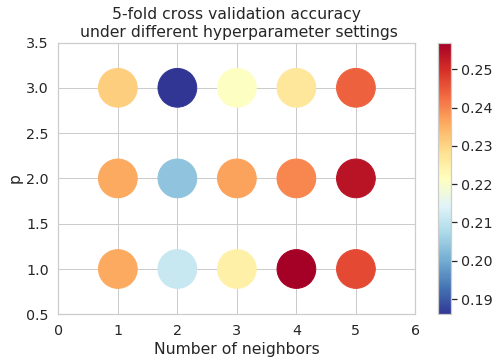

In [33]:
plt.figure(figsize=(8, 5))
sc = plt.scatter(gridSearch.cv_results_["param_n_neighbors"], 
                 gridSearch.cv_results_["param_p"], 
                 c=gridSearch.cv_results_["mean_test_score"], 
                 cmap = plt.get_cmap("RdYlBu_r"), 
                 s=1500)
plt.colorbar(sc)
plt.grid(True)
plt.gca().set_axisbelow(True)
plt.xlabel("Number of neighbors")
plt.ylabel("p")
plt.title("5-fold cross validation accuracy\n under different hyperparameter settings")
plt.xlim([0, 6])
plt.ylim([0.5, 3.5]);

Let's choose the best $p^*$ and see how accuracy depends on the number of nearest neightbors for a KNN classifier  $p$

In [34]:
p_idx = gridSearch.cv_results_["param_p"].data == best_p

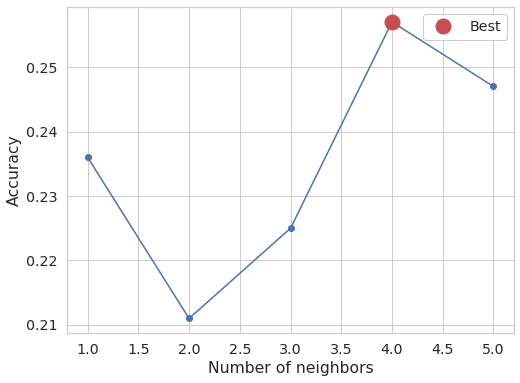

In [35]:
plt.figure(figsize=(8,6))
plt.plot(gridSearch.cv_results_["param_n_neighbors"].data[p_idx], 
         gridSearch.cv_results_["mean_test_score"][p_idx], 
         "o-")
plt.plot([best_n], [gridSearch.cv_results_["mean_test_score"][p_idx][best_n - 1]], "or", markersize=15, label="Best")
plt.xlabel("Number of neighbors")
plt.ylabel("Accuracy")
plt.title("")
plt.grid(True)
plt.legend(numpoints=1)
plt.show()

Let's have another look at  table of results (best model from the gridsearch).

In [36]:
experimentLog

,Model,Dataset,TrainAcc,TestAcc,TrainTime(sec),TestTime(sec),Param,Description
0,knn,Digits,98.52%,99.11%,17.83 secs,0.00 secs,"{'n_neighbors': 1, 'p': 2}",5-foldCV-based gridSearch BEST model


### Refit estimator with best parameters  using 50% of the training data and test on 100% of the test data
Note: This is required because we ran GridSearchCV with 2% of the available training data.

In practice make sure X_train, y_train has 100% of the training data but here we just use 50% as it might take a lot of time on your laptop. 


In [39]:
%time
import keras
from keras.datasets import cifar10
import os
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, PredefinedSplit
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from datetime import datetime
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

#Set style for plotting
sns.set(style="whitegrid", font_scale=1.3)
matplotlib.rcParams["legend.framealpha"] = 1
matplotlib.rcParams["legend.frameon"] = True

# Fix random seed for reproducibility
np.random.seed(42)

# Reload the data and downsample the train to 50%
#==================================================#
# The data, split between train and test sets:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train = np.reshape(X_train, (-1,3072))
X_test = np.reshape(X_test, (-1,3072))
y_train = np.reshape(y_train, (-1)) #reshape the y matrix to a y vector
y_test  = np.reshape(y_test, (-1))
subsample_rate = 0.5
X_train, _, y_train, _ = train_test_split(X_train, y_train, stratify=y_train, train_size=subsample_rate, random_state=42)
knn = KNeighborsClassifier(n_neighbors=gridSearch.best_params_["n_neighbors"], 
                           p=gridSearch.best_params_["p"], n_jobs=-1) 

start_time = datetime.now()  
print("got here")
knn.fit(X_train, y_train)  # make sure X_train, y_train has 100% of the training data
end_time = datetime.now()
wallTimeInSecondsTrain = (end_time - start_time).total_seconds()
print("Training time (s): ", wallTimeInSecondsTrain)

start_time = datetime.now()   
y_preds_full = knn.predict(X_test_full)  
end_time = datetime.now()
wallTimeInSecondsTest = (end_time - start_time).total_seconds()
print("Test data prediction time (s): ", wallTimeInSecondsTest)
testAcc = accuracy_score(y_test_full, y_preds_full)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 4.53 µs
got here
Training time (s):  9.368941
Test data prediction time (s):  743.642382


In [75]:
# This code calculates the accuracy on the training data,
# but as training data is 5X the size of test, it will take 5x as long
# Run it at your leisure, or just set trainAcc=0.4740% and the training evaluation time to 1 hour 
youReallyWantToRunThis = False  # it will take  an hour or more to run
if youReallyWantToRunThis:
    start_time = datetime.now()   
    y_train_preds_full = knn.predict(X_train_full) 
    end_time = datetime.now()
    wallTimeInSecondsTrainPredict = (end_time - start_time).total_seconds()
    print("Training data prediction time (s): ", wallTimeInSecondsTrainPredict)
    trainAcc = accuracy_score(y_train_full, y_train_preds_full)
else:
    wallTimeInSecondsTrainPredict = 3600.0 #seconds; not logged in our experiment table currently
    trainAcc=0.4740  #47.4% accuracy on the training data
    

In [57]:
# Track experiments in a dataframe
#------------------------------------------
try: experimentLog 
except : experimentLog = pd.DataFrame(columns=["Model", "Dataset", "TrainAcc", "TestAcc", 
                                               "TrainTime(sec)", "TestTime(sec)", "Param", "Description",])
experimentLog.loc[len(experimentLog)] =["knn", "Cifar-10", f"{trainAcc*100:8.2f}%", f"{testAcc*100:8.2f}%", 
                                    f"{wallTimeInSecondsTrain:8.2f} secs", f"{wallTimeInSecondsTest:8.2f} secs",
                                    f"{gridSearch.best_params_}","Best model trained on 50% of training data"]

experimentLog

,Model,Dataset,TrainAcc,TestAcc,TrainTime(sec),TestTime(sec),Param,Description
0,KNN Weighted Test GS,Cifar10,27.20%,26.50%,411.37 secs,0.61 secs,"{'n_neighbors': 5, 'p': 1}",5-foldCV-based gridSearch BEST model
1,KNN Weighted Test GS,Cifar10,27.20%,26.50%,411.37 secs,0.71 secs,"{'n_neighbors': 5, 'p': 1}",5-foldCV-based gridSearch BEST model
2,knn,Cifar-10,25.70%,34.57%,411.37 secs,0.71 secs,"{'n_neighbors': 4, 'p': 1}",Best model trained on 50% of training data


### Task
Please do Grid Search with weighted KNN and see if you can improve. Please report the accuracy on the test set.

In [48]:
%time
import keras
from keras.datasets import cifar10
import os
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, PredefinedSplit
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from datetime import datetime
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

#Set style for plotting
sns.set(style="whitegrid", font_scale=1.3)
matplotlib.rcParams["legend.framealpha"] = 1
matplotlib.rcParams["legend.frameon"] = True

# Fix random seed for reproducibility
np.random.seed(42)

# Reload the data and downsample train and test to 2%
#==================================================#
# The data, split between train and test sets:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train = np.reshape(X_train, (-1,3072))
X_test = np.reshape(X_test, (-1,3072))
y_train = np.reshape(y_train, (-1)) #reshape the y matrix to a y vector
y_test  = np.reshape(y_test, (-1))
subsample_rate = 0.02
X_train, _, y_train, _ = train_test_split(X_train, y_train, stratify=y_train, train_size=subsample_rate, random_state=42)
X_test, _, y_test, _ = train_test_split(X_test, y_test, stratify=y_test, train_size=subsample_rate, random_state=42)

# Set the parameters by cross-validation
#==================================================#
#               Place your code between here       #

#               ... and here                       #
knn_weighted= KNeighborsClassifier(weights= 'distance', n_jobs=-1)
# submission quiz, only submit the code you added  #
# (or modified) between the comment blocks         #
#                                                  #
# Hint: set n_jobs=-1 to use all your available CPUs#
#==================================================#
n_neighbors_range = list(range(1,6))
p_range = list (range(1,4))
parameters = {'n_neighbors': n_neighbors_range, 'p': p_range}
start_time = datetime.now()
knn_weighted_gs = GridSearchCV(knn_weighted, parameters, cv=5, n_jobs=-1, verbose=2)
knn_weighted_gs.fit(X_train, y_train)
end_time = datetime.now()
wallTimeInSecondsTrain = (end_time - start_time).total_seconds()

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 6.68 µs
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:  6.9min finished


In [53]:
print('Best parameters:', knn_weighted_gs.best_params_)

Best parameters: {'n_neighbors': 5, 'p': 1}


In [54]:
train_acc = knn_weighted_gs.best_score_ 

start_time = datetime.now()   
test_preds = knn_weighted_gs.best_estimator_.predict(X_test)
test_acc = accuracy_score(y_test, test_preds)
end_time = datetime.now()
wallTimeInSecondsTest = (end_time - start_time).total_seconds()


In [55]:
# Track experiments in a dataframe
#------------------------------------------
try: experimentLog 
except : experimentLog = pd.DataFrame(columns=["Model", "Dataset", "TrainAcc", "TestAcc", 
                                               "TrainTime(sec)", "TestTime(sec)", "Param", "Description",])
experimentLog.loc[len(experimentLog)] =["KNN Weighted Test GS", "Cifar10", f"{train_acc*100:8.2f}%", f"{test_acc*100:8.2f}%", 
                                    f"{wallTimeInSecondsTrain:8.2f} secs", f"{wallTimeInSecondsTest:8.2f} secs",
                                    f"{knn_weighted_gs.best_params_}","5-foldCV-based gridSearch BEST model"]


In [56]:
experimentLog

,Model,Dataset,TrainAcc,TestAcc,TrainTime(sec),TestTime(sec),Param,Description
0,KNN Weighted Test GS,Cifar10,27.20%,26.50%,411.37 secs,0.61 secs,"{'n_neighbors': 5, 'p': 1}",5-foldCV-based gridSearch BEST model
1,KNN Weighted Test GS,Cifar10,27.20%,26.50%,411.37 secs,0.71 secs,"{'n_neighbors': 5, 'p': 1}",5-foldCV-based gridSearch BEST model


### Discussion
Weighted KNN does not bring any major improvements here. This is most likely due to the small training set (2% sample). 

## Homemade KNN Classifier on CIFAR10

Complete the code for the following  homegrown KNN Classifier with k=3,  and with Euclidean distance as similarity metric. Try to write the code for the loop of KNN in one line, on the same line!


In [60]:
%time
import keras
from keras.datasets import cifar10
import os
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, PredefinedSplit
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from datetime import datetime
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Fix random seed for reproducibility
np.random.seed(42)

# Reload the data and downsample train and test to 2%
#==================================================#
# The data, split between train and test sets:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train = np.reshape(X_train, (-1,3072))
X_test = np.reshape(X_test, (-1,3072))
y_train = np.reshape(y_train, (-1)) #reshape the y matrix to a y vector
y_test  = np.reshape(y_test, (-1))
subsample_rate = 0.10  #use 10% of the data
X_train, _, y_train, _ = train_test_split(X_train, y_train, stratify=y_train, train_size=subsample_rate, random_state=42)
X_test, _, y_test, _ = train_test_split(X_test, y_test, stratify=y_test, train_size=subsample_rate, random_state=42)
start_time = datetime.now()
# Set the parameters by cross-validation
#==================================================#
#               Place your code between here       #
n = 3
predicted_classes = np.zeros(shape=(X_test.shape[0]), dtype=np.int)
for i in range(X_test.shape[0]):predicted_classes[i]= np.argmax(np.bincount(y_train[np.argsort(np.linalg.norm(X_test[i]-X_train, ord = 2, axis= 1))[:n]]))
#               ... and here                       #
# When asked to copy/paste your code in homework   # 
# submission quiz, only submit the code you added  #
# (or modified) between the comment blocks         #
#                                                  #
# Hint:                 #
#==================================================#

end_time = datetime.now()
wallTimeInSecondsTrain = (end_time - start_time).total_seconds()
print(f"\nThe KNN accuracy for k ={n} on the test set is {100 * accuracy_score(y_test, predicted_classes):.3}%")
print(f"wallTimeInSecondsTrain: {wallTimeInSecondsTrain}")


CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 8.34 µs

The KNN accuracy for k =3 on the test set is 18.5%
wallTimeInSecondsTrain: 78.060596


In [53]:
wallTimeInSecondsTrain

78.629922

#  KNN model for predicting real numbers (i.e., regression)

The K-Nearest Neighbors (KNN) Algorithm is a robust, extremely simple, and very popular machine learning method. It’s simple to implement but still a competitive and performant machine learning technique. For more background on KNN, see [WikiPedia](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm)

## Training a KNN model
Training a KNN model simply reduces to following:
* storing your training data, 
* a storing hyper parameters such as 
  * the and the number of neighbors used
  * the similar metric or distance metric used
  * other hyperparameters to be discussed below.
  
In short the  whole training data set is your model. REPEAT: the whole training data set is your model (i.e., you need to store it and consult each example when making a prediction). This is very different to, say, linear regression models where the model is just the slope and intercept in the case of simple linear regression (a single input variable). In addition, the training data can be discarded after learning the slope and intercept.

## Prediction using a KNN model
Making a prediction using a KNN model involves all the training data.

### Prediction STEPS:

1. Find the K nearest neighbors of x (according to a predefined similarity metric).
* Aggregate the K nearest neighbors into a single “prediction” or “classification” value. 
  * You can use any aggregator function such as average, mean, max, min, etc.
  * So far, for classification, we have used the most frequent class in the nearest neighbors (from the training data) as the class. If there ties, pick a class randomly.
  * For regression we can think of many possible aggregation functions, average being the most popular.
  
## KNN for a simple regression problem: house price prediction

Suppose, your company sells homes for clients. It has acquired a large database of customers and  house prices.

One day, your client asks how much he can expect to pay for a house with 52 square meters.  You query your KNN “model” and it immediately gives you the response $\$33,167$. And indeed, your client finds a home for $\$33,489$ the same week. How did the KNN system come to this surprisingly accurate prediction?

It simply calculated the K=3 nearest neighbors to the query “D=52 square meters” from the model with regards Euclidean distance. The three nearest neighbors are A, B, and C with prices $\$34,000, \$33,500,$ and $\$32,000$ respectively. In the final step, the KNN aggregates the three nearest neighbors by calculating the simple average. As K=3 in this example, we denote the model as “3NN”.

Of course, you can vary the similarity functions, the parameter K, and the aggregation method to come up with more sophisticated prediction models. This example is presented graphichally below.

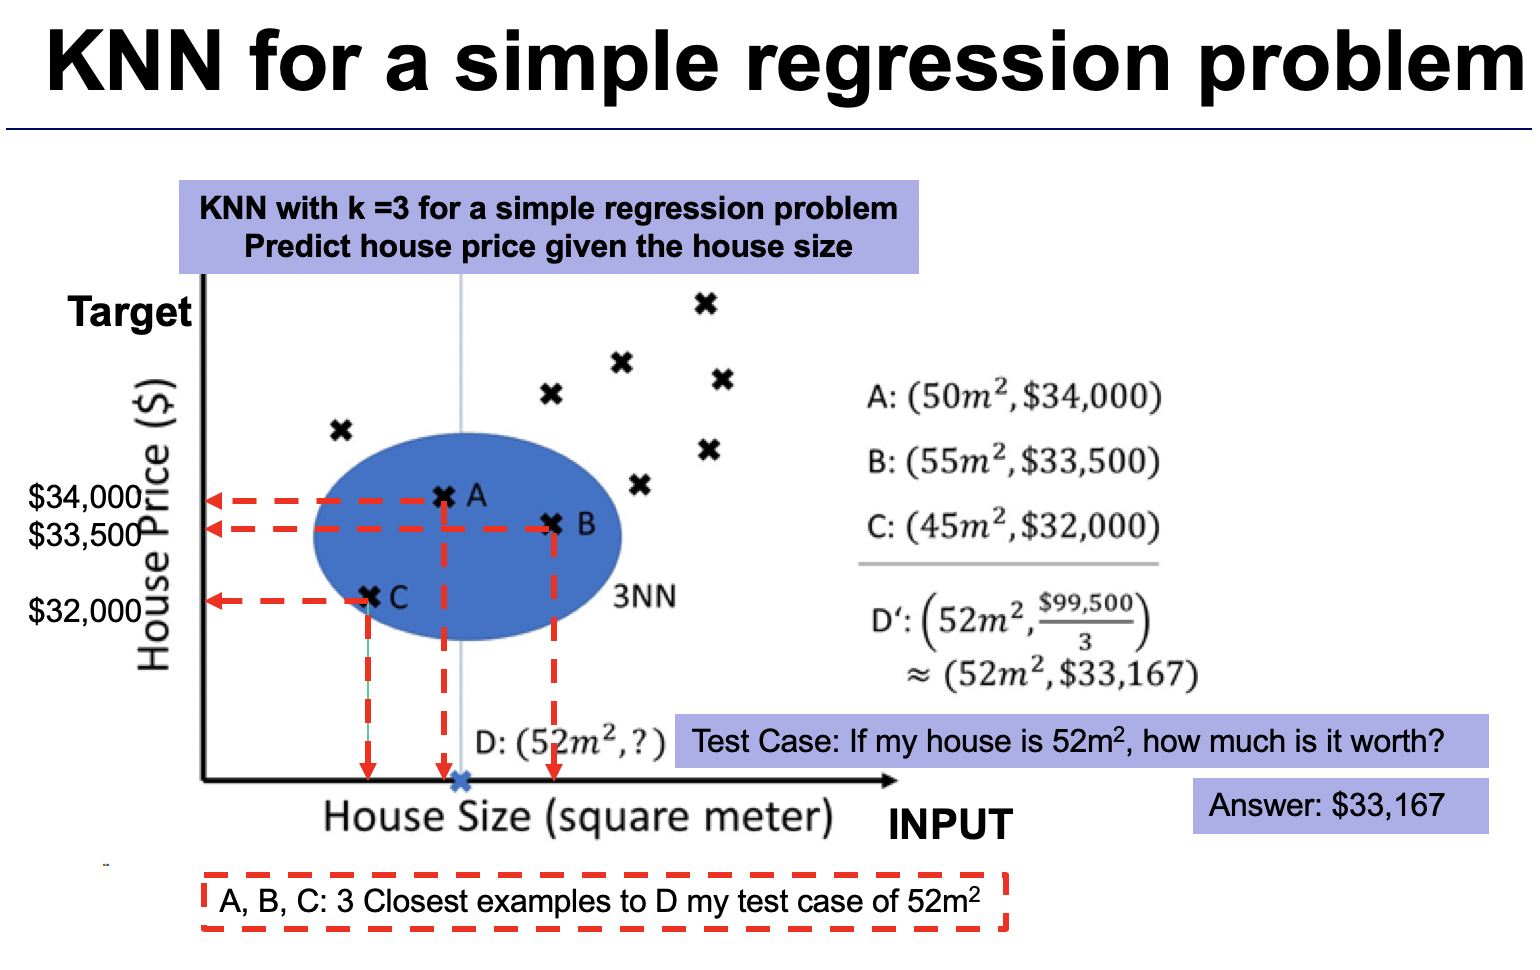

**Figure: KNN where k = 3 for a simple regression model. [Example based on source](https://blog.finxter.com/k-nearest-neighbors-as-a-python-one-liner/)**

## Some Theory: Prediction, including both classification and regression
<p>Let’s fix our setting. As usual, we have a database of <span class="math inline">\(n\)</span> items, represented as vectors of <span class="math inline">\(p\)</span> features. Following the usual notation for regression courses, we’ll write this as an <span class="math inline">\(n\times p\)</span> matrix <span class="math inline">\(\mathbf{x}\)</span>; the vector for data-point <span class="math inline">\(i\)</span> will be <span class="math inline">\(\vec{x}_i\)</span>. (To get to this point, we may have done some dimension reduction as a pre-processing step, but that won’t matter for us here.) Beyond these features, we have an additional variable for each item that we want to <strong>predict</strong>, based on the features. We’ll write it <span class="math inline">\(y_i\)</span> for data-point <span class="math inline">\(i\)</span>, compiled into the <span class="math inline">\(n\times 1\)</span> matrix <span class="math inline">\(\mathbf{y}\)</span> (again, this is regression notation). This variable is called the <strong>label</strong>, <strong>outcome</strong>, <strong>target</strong>, <strong>output</strong> or (oddly) <strong>dependent variable</strong> (sometimes even just called the <strong>predictand</strong>).</p>
<p>A prediction here is going to be a function of the features which outputs a guess (“point prediction”) about the outcome or label.</p>
<ul>
<li><strong>Regression</strong>: <span class="math inline">\(y\)</span> is a continuous numerical variable, so the <strong>regression function</strong> should map <span class="math inline">\(\vec{x}\)</span> to a number.</li>
<li><strong>Classification</strong>: <span class="math inline">\(y\)</span> is binary, so the <strong>classification rule</strong> should map <span class="math inline">\(\vec{x}\)</span> to 0 or 1.
<ul>
<li>Multi-class classification works similarly but with more notation.</li>
</ul></li>
</ul>

## Nearest neighbors as a predictor
<p>This is where nearest neighbors comes in.</p>
<p>In this context, “distance” always refers to distances between the <span class="math inline">\(p\)</span>-dimensional feature vectors. The <strong>nearest neighbor</strong> of a vector <span class="math inline">\(\vec{x}\)</span> is the <span class="math inline">\(\vec{x}_i\)</span> closest to it. The <span class="math inline">\(k\)</span> nearest neighbors are the <span class="math inline">\(k\)</span> vectors <span class="math inline">\(\vec{x}_i\)</span> closest to <span class="math inline">\(\vec{x}\)</span>. (Notice that these definitions make sense whether or not <span class="math inline">\(\vec{x}\)</span> is also one of the <span class="math inline">\(\vec{x}_i\)</span>.) We will often need a way of keeping track of the indices of the neighbors, so we’ll write <span class="math inline">\(NN(\vec{x}, j)\)</span> for the index of the <span class="math inline">\(j^{\mathrm{th}}\)</span> nearest neighbor of <span class="math inline">\(\vec{x}\)</span>.</p>
<p>The k-nearest-neighbor estimate of the regression function is then the average value of the response over the <span class="math inline">\(k\)</span> nearest neighbors: <span class="math display">\[
\hat{\mu}(\vec{x}) = \frac{1}{k}\sum_{j=1}^{k}{y_{NN(\vec{x}, j)}}
\]</span> For classification, we similarly average the labels of neighbors to estimate <span class="math inline">\(p(\vec{x})\)</span>, <span class="math display">\[
\hat{p}(\vec{x}) = \frac{1}{k}\sum_{j=1}^{k}{y_{NN(\vec{x}, j)}}
\]</span> and then threshold it: <span class="math display">\[
\hat{c}(\vec{x}) = \mathbf{1}(\hat{p}(\vec{x}) \geq 0.5)
\]</span></p>
</div>

### Similarity as distance
K Nearest Neighbors classier is the simplest **metric** classifier. The idea behind it is to find $k$ most *similar* objects and make a classification decision based on them. To formalize the notion of similarity one should introduce the measure of the difference. Here we're going to use $L_p$ norm and induced metric.

$$
d_p(\mathbf{x}_1, \mathbf{x}_2) = \|\mathbf{x}_1 - \mathbf{x}_2\|_p = \left( \sum_{j=1}^{m}\left| x_{1, \,j} - x_{2, \,j} \right|^p \right)^{1/p}
$$

There are special names for some of the $L_p$ metrics:
* $p=1$ is Manhattan distance
* $p=2$ is Euclidian distance

For other metrics one can see [here](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html)

The process of learning for KNN classifier is no more than just remembering all the training examples to find the closest one later on. There are smart ways (such as [KD trees](https://en.wikipedia.org/wiki/K-d_tree)) of storing training objects to be able to find nearest one very fast (faster than simply scanning through all of them). But here you need to implement it as a simple **array**.

For the prediction the following strategy is used:
* Find $k$ closest examples from train set
* For CLASSIFICATION, find the most frequent label among these $k$ closest objects (if there are few labels with the same number of objects than pick any label from those)
* Assign this label to new object

## KNN Regression via a one-liner using SKLearn

In [73]:
## Dependencies
from sklearn.neighbors import KNeighborsRegressor
import numpy as np


## Training Data (House Size (square meters)
## A single input variable
X = np.array([[35], [45], [40],
              [35], [25], [40]])

## Target or output variable 
## house price in $ (very cheap houses!)
y = np.array([30000,  45000, 50000, 35000, 32500, 40000])

## One-liner using SKLearn's built-in KNN
## use a bench mark to verify your homegrown version
KNN = KNeighborsRegressor(n_neighbors=3).fit(X, y)


## Test Case with a house size of 30 squared meters
test_case = [30]
predicted_house_price = KNN.predict([test_case])
print(f"predicted_house_price for a {test_case} square meter house is  ${predicted_house_price[0]}")

predicted_house_price for a [30] square meter house is  $32500.0


First, we create a new machine learning model called `KNeighborsRegressor()`. If you would like to take KNN for classification, you would take the model `KNeighborsClassifier`.

Second, we “train” the model using the `fit()` function with two parameters. The first parameter defines the input (the house size) and the second parameter defines the output (the house price). The shape of both parameters must be so that each observation is an array-like data structure .

`KNeighborsRegressor()` expects the input data as 2D NumPy array as an input to the fit function; the function would not work properly because it expects an array of (array-like) observations – and not an array of integers.

In [77]:
X 

array([[35],
       [45],
       [40],
       [35],
       [25],
       [40]])

In [78]:
y

array([30000, 45000, 50000, 35000, 32500, 40000])

### KNN Regression graphically

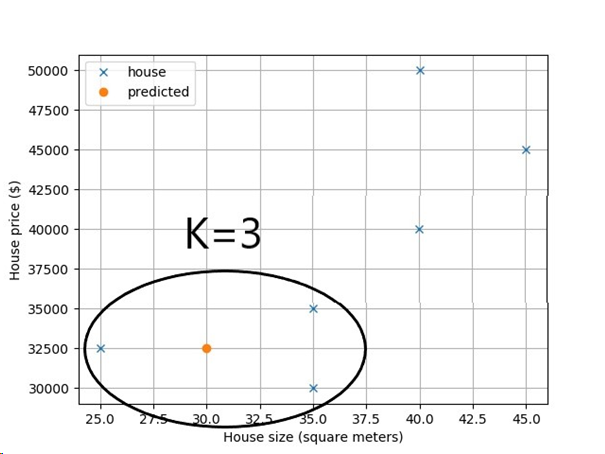

The KNN algorithm finds the three closest houses with respect to house size and averages the predicted house price as the average of the K=3 nearest neighbors.

Thus, the result is $ \$32,500$.

# Assignment: KNN Regression



## Task: KNN regression model for the Boston housing data

Using SKLearn's implemention of KNN, determine a good KNN regression model for the Boston housing data

* put 20% of the data aside as a random test that should not be used during training (and it should be not during hyperparameter tuning). Please use it to report MSE (Mean squared error) on the model you deem best after hyperparameter tuning via GridSearch and cross validation. 

## Boston housing data
In this section  we're going to build a basic predictive regression model for estimating the house prices in thousands of $ given some housing factors such as crime rate in neighborhood, number of schools % lower status of the population etc.

The  Boston dataset is  commonly in machine learning experiments as a benchmark and teaching aid thus it is embedded in sklearn.

### Load and split the data

In [70]:
from sklearn.datasets import load_boston
boston = load_boston()
print("Data shape: {}".format(boston.data.shape))

Data shape: (506, 13)


In [71]:
X = boston.data
y = boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

Detailed description of dataset and features

In [72]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### Lets do some EDA
Create pandas dataframe with example houses in rows and features in columns

In [67]:
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target

In [68]:
X.head() #X.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Let's look at the summary statistics

In [69]:
X.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


### Drop normalization step here to simplify the task 

For this regression problems we would always do some form of normalization. Here to 
simplify our pipeline we drop the normalization step and just use unnormalized data (probably 
will end up with a model that has a big error on the test dataset).

### Find best KNNRregressor via Grid search crossfold validation 

In [40]:
 #####  6.2.4 Find best KNNRregressor hyperparameters are {'n_neighbors': 4, 'p': 1, 'weights': 'distance'}

%time
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, PredefinedSplit
from datetime import datetime
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston

boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=.2, random_state=42)
start_time = datetime.now()
np.random.seed(42) 

knn_reg = KNeighborsRegressor()
parameters = {'n_neighbors': list(range(1,11)),
              'p': list(range(1,4)),
              'weights': ['uniform', 'distance']}
                
# Set up the Grid search over the hyperparameters
# with THREE fold cross validation
# scoring='neg_mean_squared_error' 
#==================================================#
#               Place your code between here       #

knn_reg_gs = GridSearchCV(knn_reg, parameters, cv = 3, n_jobs = -1, scoring = 'neg_mean_squared_error')

#               ... and here                       #
# When asked to copy/paste your code in homework   # 
# submission quiz, only submit the code you added  #
# (or modified) between the comment blocks         #
#                                                  #
# Hint: set n_jobs=-1 to use all your available CPUs#
#  set cv=3, that THREE Fold cross fold validation #
#  set correct scoring option (negative MSE)       #
#  i.e., scoring='neg_mean_squared_error'          #
#==================================================#

knn_reg_gs.fit(X_train, y_train)
print(f"knn_reg_gs.best_estimator_: {knn_reg_gs.best_params_}")

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 6.44 µs
knn_reg_gs.best_estimator_: {'n_neighbors': 4, 'p': 1, 'weights': 'distance'}


/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


### Calculate the mean squared error on the test data

In [41]:
test_preds = knn_reg_gs.predict(X_test)
print(f"Mean squared error is : {round(mean_squared_error(y_test, test_preds),3)}")

Mean squared error is : 20.684


In [42]:
knn_reg_gs.best_estimator_

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=4, p=1,
                    weights='distance')

In [43]:
from sklearn.metrics import mean_squared_error
results = pd.DataFrame(columns=["Model", "k", "p", "weights","MSE"])
results.loc[len(results)] = ["KNN Regressor Test", knn_reg_gs.best_params_['n_neighbors'],
                             knn_reg_gs.best_params_['p'], knn_reg_gs.best_params_['weights'],
                             round(mean_squared_error(y_test, test_preds),3)]
results

,Model,k,p,weights,MSE
0,KNN Regressor Test,4,1,distance,20.684


### Discussion 
The MSE for a linear regression model is 17.483062 (see in the coming lectures). So the KNN MSE of XXXXX is competitive!

We will revisit the Boston House price prediction problem in more detail in the coming lectures.


## Homemade KNN Regressor on Boston


Complete the code for the following  homegrown KNN Regression with k=4,  and with Manhattan distance as the similarity metric. Try to write the code for the loop of KNN in one line, on the same line! 

BUT first let's benchmark against SKLearn's builtin KNN Regressor so we know what to expect.

### Benchmark Homemade KNN Regressor versus SKLearn's regressor

Both your Homemade KNN Regressor and  SKLearn's regressor should produce a similar MSE under the same learning conditions (i.e., same hyperparamters, and same training and teating data). Otherwise you have a bug in your code.



In [61]:
# Compare to SKLearn
start_time = datetime.now()
n=4
skLearn_knn_reg = KNeighborsRegressor(n_neighbors = n, p=1, weights ='uniform')
skLearn_knn_reg.fit(X_train, y_train)
test_preds_skLearn = skLearn_knn_reg.predict(X_test)
end_time = datetime.now()
wallTimeInSecondsTrain = (end_time - start_time).total_seconds()
MSE_sklearn_knn = mean_squared_error(y_test, test_preds_skLearn)
print(f"\nThe SKLearn KNN Regressor Mean squared error is : {mean_squared_error(y_test, test_preds_skLearn):10.5}")
print(f"SKLearn KNN Regressor wall clock time in seconds: {wallTimeInSecondsTrain}")



The SKLearn KNN Regressor Mean squared error is :      8.264
SKLearn KNN Regressor wall clock time in seconds: 32.068781


### Homemade code KNN Regressor on Boston

In [44]:
%time
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, PredefinedSplit
from datetime import datetime
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=.2, random_state=42)
start_time = datetime.now()
# Set the parameters by cross-validation
#==================================================#
#               Place your code between here       #
n = 4
test_preds = np.zeros(shape=(X_test.shape[0]), dtype= np.int)
for i in range(X_test.shape[0]):
    test_preds[i]= np.mean(y_train[np.argsort(np.linalg.norm(X_test[i]-X_train, ord = 1, axis= 1))[:n]])
#               ... and here                       #
# When asked to copy/paste your code in homework   # 
# submission quiz, only submit the code you added  #
# (or modified) between the comment blocks         #
#                                                  #
# Hint: predictions are real numbers so take       #
#       mean of the nearest neighbors              #
#==================================================#

end_time = datetime.now()
wallTimeInSecondsTrain = (end_time - start_time).total_seconds()
MSE_homemade_knn = mean_squared_error(y_test, test_preds)
print(f"\nThe Homemade KNN Regressor Mean squared error is : {mean_squared_error(y_test, test_preds):10.5}")
print(f"Homemade KNN Regressor wall clock time in seconds: {wallTimeInSecondsTrain}")

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 4.53 µs

The Homemade KNN Regressor Mean squared error is :     22.288
Homemade KNN Regressor wall clock time in seconds: 0.012306


In [45]:
wallTimeInSecondsTrain

0.012306

### Benchmark and ASSERT that your homemade KNNRegressor's MSE is equal to SKLearn's!

In [46]:
# Compare to SKLearn
start_time = datetime.now()
n=4
skLearn_knn_reg = KNeighborsRegressor(n_neighbors = n, p=1, weights ='uniform')
skLearn_knn_reg.fit(X_train, y_train)
test_preds_skLearn = skLearn_knn_reg.predict(X_test)
end_time = datetime.now()
wallTimeInSecondsTrain = (end_time - start_time).total_seconds()
MSE_sklearn_knn = mean_squared_error(y_test, test_preds_skLearn)
print(f"\nThe SKLearn KNN Regressor Mean squared error is : {mean_squared_error(y_test, test_preds_skLearn):10.5}")
print(f"SKLearn KNN Regressor wall clock time in seconds: {wallTimeInSecondsTrain}")

print(f"the Homemade KNN Regressor gives a different MSE of {MSE_homemade_knn:10.5} vs. SKLearn's MSE of {MSE_sklearn_knn:10.5}")


## The MSEs for both the homegrown KNN Regressor and SKLearns KNN Regressor should be similar
## How similar?!?
#  Other ERROR and halt!
print(f"Possible ERROR::: the Homemade KNN Regressor gives a different MSE {MSE_homemade_knn:10.5} vs. {MSE_sklearn_knn:10.5}")



The SKLearn KNN Regressor Mean squared error is :     21.733
SKLearn KNN Regressor wall clock time in seconds: 0.004241
the Homemade KNN Regressor gives a different MSE of     22.288 vs. SKLearn's MSE of     21.733
Possible ERROR::: the Homemade KNN Regressor gives a different MSE     22.288 vs.     21.733
